# Plotting results for paper
This notebook is used to plot the results presented in the paper.
The numerical results are stored as dictionaries in ``plotting-results/data/``.

In [17]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

data_dir = os.path.join(os.getcwd(), 'data')
print('Path to data: ', data_dir)

Path to data:  /work/go68qah/rqcopt-mpo/plotting-results/data


## Disordered Ising model with 20 sites

In [2]:
# Load the data
with open(os.path.join(data_dir,'20_ising.pkl'), 'rb') as fp:
    data = pickle.load(fp)
    n_sites = data['n_sites']
    t = data['t']

    # Trotter circuit of order I
    n_layers_I = data['n_layers_I']
    err_I = data['err_I']

    # Trotter circuit of order II
    n_layers_II = data['n_layers_II']
    err_II = data['err_II']

    # Trotter circuit of order IV
    n_layers_IV = data['n_layers_IV']
    err_IV = data['err_IV']

    # Riemannian optimized quantum circuit
    n_layers = data['n_layers']
    err_opts = data['err_opts']

/tmp/ipykernel_2527031/1118639074.py:3: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(fp)


In [3]:
def plotting_ising_disordered(
        n_layers_I, n_layers_II, n_layers_IV, n_layers,
        err_I, err_II, err_IV, err_opts,
        figsize=[5,3], save=False, filetype='png'
):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    for i in range(len(n_layers_I)):
        if i==0:
            axs.plot(n_layers_I[i], err_I[i], 'D-', ms=3, color="darkblue", lw=0.2, label='Trotter I', zorder=10)
            axs.plot(n_layers_II[i], err_II[i], 'D-', ms=3, color="purple", lw=0.2, label='Trotter II', zorder=10)
            axs.plot(n_layers_IV[i], err_IV[i], 'D-', ms=3, color="darkcyan", lw=0.2, label='Trotter IV', zorder=10)
            axs.plot(n_layers[i], err_opts[i], 'D-', ms=3, color="darkorange", lw=0.2, label='Optimized circuit', zorder=10)
        else: 
            axs.plot(n_layers_I[i], err_I[i], 'o-', color="darkblue", mfc='white', lw=0.2)
            axs.plot(n_layers_II[i], err_II[i], 'o-', color="purple", mfc='white', lw=0.2)
            axs.plot(n_layers_IV[i], err_IV[i], 'o-', color="darkcyan", mfc='white', lw=0.2)
            axs.plot(n_layers[i], err_opts[i], 'o-', color="darkorange", mfc='white', lw=0.2)

    axs.set_xlabel('Number of layers')
    axs.set_ylabel('$\mathcal{C}$')
    axs.legend()
    axs.grid(True)
    axs.set_xscale('log')
    axs.set_yscale('log')
    fig.tight_layout()

    if save:
        fname = os.path.join('gfx', '20_ising-1d.')
        if filetype=='tex':
                tikzplotlib.clean_figure()
                tikzplotlib.save(fname+filetype)
        else:
                plt.savefig(fname+filetype)
    plt.show()

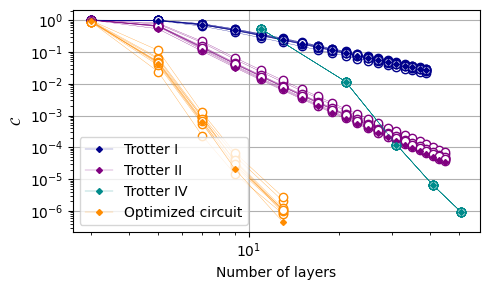

In [4]:
_ = plotting_ising_disordered(
        n_layers_I, n_layers_II, n_layers_IV, n_layers,
        err_I, err_II, err_IV, err_opts,
        figsize=[5,3], save=True, filetype='pdf'
)

## Non-disordered Ising model on 50 sites

In [5]:
# Load data
with open(os.path.join(data_dir,'50_ising.pkl'), 'rb') as fp:
    data = pickle.load(fp)
    n_sites = data['n_sites']
    t = data['t']

    # Trotter circuit of order I
    n_layers_I = data['n_layers_I']
    err_I = data['err_I']
    n_repetitions_I = data['n_repetitions_I']

    # Trotter circuit of order II
    n_layers_II = data['n_layers_II']
    err_II = data['err_II']
    n_repetitions_II = data['n_repetitions_II']

    # Trotter circuit of order IV
    n_layers_IV = data['n_layers_IV']
    err_IV = data['err_IV']
    n_repetitions_IV = data['n_repetitions_IV']

    # Riemannian optimized quantum circuit
    n_layers = data['n_layers']
    err_opts = data['err_opts']
    n_repetitions = data['n_repetitions']

    # Scaling data
    xI, yI = data['xI'], data['yI']
    xII, yII = data['xII'], data['yII']
    xIV, yIV = data['xIV'], data['yIV']
    xopt, yopt = data['xopt'], data['yopt']

/tmp/ipykernel_2527031/4045359940.py:3: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(fp)


In [6]:
def plotting_ising_full(t, 
                        n_layers_I, n_layers_II, n_layers_IV, n_layers, err_I, err_II, err_IV, err_opts,
                        n_repetitions_I, n_repetitions_II, n_repetitions_IV, n_repetitions, 
                        xI, xII, xIV, xopt, yI, yII, yIV, yopt,
                        figsize=[12,3], save=False, filetype='png'):

        fig, axs = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=figsize)

        axs[0].plot(n_layers_I, err_I, 'o-', color='darkblue', lw=0.8, mfc='white', label='Trotter I')
        axs[0].plot(n_layers_II, err_II, 'o-', color='darkorange', lw=0.8, mfc='white', label='Trotter II')
        axs[0].plot(n_layers_IV, err_IV, 'o-', color='purple', lw=0.8, mfc='white', label='Trotter IV')
        axs[0].plot(n_layers, err_opts, 'o-', color="darkcyan", lw=2, label='Optimized circuit')

        axs[0].set_xlabel('Number of layers')
        axs[0].set_ylabel('$\mathcal{C}_F$')
        axs[0].legend()
        axs[0].grid(True)
        axs[0].set_xscale('log')
        axs[0].set_yscale('log')
        
        off=-1
        axs[1].plot(t/n_repetitions_I[:off], np.sqrt(np.array(err_I)[:off]), 'o-', color='darkblue', lw=0.8, mfc='white', label='Trotter I')
        axs[1].plot(xI[:off], yI[:off], '-', color='darkblue', lw=10, alpha=0.2, label='$\mathcal{O}(\Delta t^1)$')
        axs[1].plot(t/n_repetitions_II[:off], np.sqrt(np.array(err_II)[:off]), 'o-', color='darkorange', lw=0.8, mfc='white', label='Trotter II')
        axs[1].plot(xII[:off], yII[:off], '-', color='darkorange', lw=10, alpha=0.1, label='$\mathcal{O}(\Delta t^2)$')
        axs[1].plot(t/n_repetitions_IV, np.sqrt(np.array(err_IV)), 'o-', color='purple', lw=0.8, mfc='white', label='Trotter IV')
        axs[1].plot(xIV, yIV, '-', color='purple', lw=10, alpha=0.3, label='$\mathcal{O}(\Delta t^4)$')
        axs[1].plot(t/n_repetitions, np.sqrt(np.array(err_opts)), 'o-', color='darkcyan', lw=2, label='Optimized circuit')
        axs[1].plot(xopt[:-6], yopt[:-6], '-', color='darkcyan', lw=10, alpha=0.2, label='$\mathcal{O}(\Delta t^{5.13})$')

        axs[1].set_xlabel('Trotter time step $\Delta t$')
        axs[1].set_ylabel('$\mathcal{C}^{1/2}$')
        axs[1].legend(ncols=2, loc='lower right')
        axs[1].grid(True)
        axs[1].set_xscale('log')
        axs[1].set_yscale('log')
        axs[1].set_xlim(1.5e-1,2.5)
        axs[1].set_ylim(1e-4,5)
        
        plt.tight_layout()
        if save:
                fname = os.path.join('gfx', '50_ising-1d.')
                if filetype=='tex':
                        tikzplotlib.clean_figure()
                        tikzplotlib.save(fname+filetype)
                else:
                        plt.savefig(fname+filetype)
        plt.show()

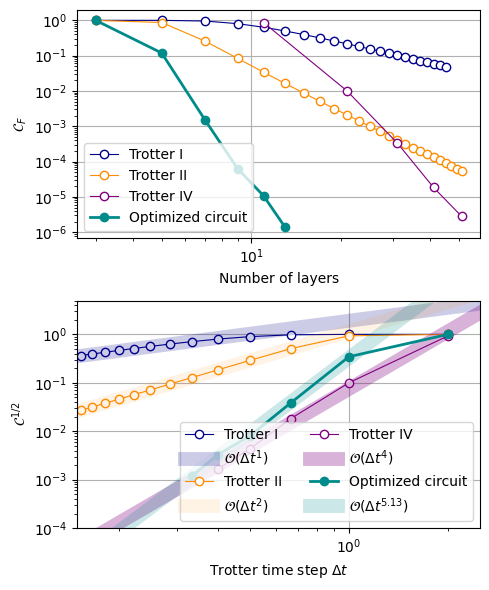

In [7]:
_ = plotting_ising_full(t, 
                        n_layers_I, n_layers_II, n_layers_IV, n_layers, err_I, err_II, err_IV, err_opts,
                        n_repetitions_I, n_repetitions_II, n_repetitions_IV, n_repetitions,
                        xI, xII, xIV, xopt, yI, yII, yIV, yopt,
                        figsize=[5,6], save=True, filetype='pdf')

## Heisenberg mode on 50 sites

In [8]:
# Load data
with open(os.path.join(data_dir,'50_heisenberg.pkl'), 'rb') as fp:
    data = pickle.load(fp)
    n_sites = data['n_sites']
    t = data['t']

    # Trotter circuit of order I
    n_layers_I = data['n_layers_I']
    err_I = data['err_I']

    # Trotter circuit of order II
    n_layers_II = data['n_layers_II']
    err_II = data['err_II']

    # Trotter circuit of order IV
    n_layers_IV = data['n_layers_IV']
    err_IV = data['err_IV']

    # Riemannian optimized quantum circuit
    n_layers = data['n_layers']
    err_opts = data['err_opts']


In [9]:
def plot_heisenberg(n_layers_I, n_layers_II, n_layers_IV, n_layers,
                    err_I, err_II, err_IV, err_opts,
                    figsize=[5,3], save=False, filetype='png'):
    
    plt.figure(figsize=figsize)
    plt.plot(n_layers_I, err_I, 'o-', color='darkblue', lw=0.8, mfc='white', label='Trotter I')
    plt.plot(n_layers_II, err_II, 'o-', color='darkorange', lw=0.8, mfc='white', label='Trotter II')
    plt.plot(n_layers_IV, err_IV, 'o-', color='purple', lw=0.8, mfc='white', label='Trotter IV')
    plt.plot(n_layers, err_opts, 'o-', color='darkcyan', lw=2, label='Optimized circuit')

    plt.xlabel('Number of layers')
    plt.ylabel('$\mathcal{C}$')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    plt.tight_layout()

    if save:
        fname = os.path.join('gfx', '50_heisenberg.')
        if filetype=='tex':
            tikzplotlib.clean_figure()
            tikzplotlib.save(fname+filetype)
        else:
            plt.savefig(fname+filetype)
    plt.show()

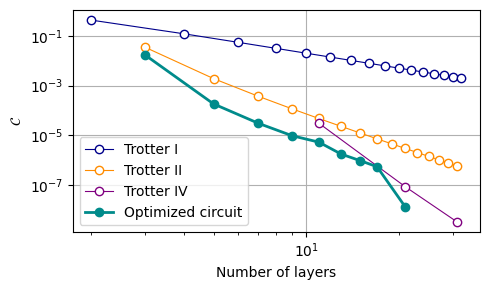

In [10]:
_ = plot_heisenberg(n_layers_I[:-4], n_layers_II[:-15], n_layers_IV, n_layers,
                    err_I[:-4], err_II[:-15], err_IV, err_opts,
                    figsize=[5,3], save=True, filetype='pdf')

## Fermi-Hubbard model on 50 sites

In [11]:
# Load data
with open(os.path.join(data_dir,'50_fermi-hubbard.pkl'), 'rb') as fp:
    data = pickle.load(fp)
    n_sites = data['n_sites']
    t = data['t']

    # Trotter circuit of order I
    n_layers_I = data['n_layers_I']
    err_I = data['err_I']

    # Trotter circuit of order II
    n_layers_II = data['n_layers_II']
    err_II = data['err_II']

    # Trotter circuit of order IV
    n_layers_IV = data['n_layers_IV']
    err_IV = data['err_IV']

    # Riemannian optimized quantum circuit
    n_layers = data['n_layers']
    err_opts = data['err_opts']


In [12]:
def plotting_fermi_hubbard(
        n_layers_I, n_layers_II, n_layers_IV, n_layers,
        err_I, err_II, err_IV, err_opts,
        figsize=[5,3], save=False, filetype='png'
):
    plt.figure(figsize=figsize)
    plt.plot(n_layers_I, err_I, 'o-', color='darkblue', lw=0.8, mfc='white', label='Trotter I')
    plt.plot(n_layers_II, err_II, 'o-', color='darkorange', lw=0.8, mfc='white', label='Trotter II')
    plt.plot(n_layers_IV, err_IV, 'o-', color='purple', lw=0.8, mfc='white', label='Trotter IV')
    plt.plot(n_layers, err_opts, 'o-', color='darkcyan', lw=2, label='Optimized circuit')


    plt.xlabel('Number of layers')
    plt.ylabel('$\mathcal{C}$')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')

    if save:
        fname = os.path.join('gfx', '50_fermi-hubbard.')
        if filetype=='tex':
            tikzplotlib.clean_figure()
            tikzplotlib.save(fname+filetype)
        else:
            plt.savefig(fname+filetype)

    plt.show()

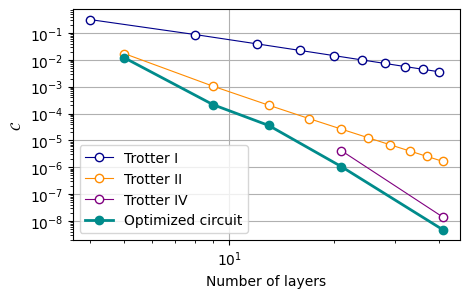

In [13]:
_ = plotting_fermi_hubbard(
        n_layers_I, n_layers_II, n_layers_IV, n_layers,
        err_I, err_II, err_IV, err_opts,
        figsize=[5,3], save=True, filetype='pdf'
)

## Molecular system: LiH

In [14]:
# Load data
with open(os.path.join(data_dir,'LiH_molecular.pkl'), 'rb') as fp:
    data = pickle.load(fp)

    err_rel_1 = data['err_rel_1']
    err_rel_2 = data['err_rel_2']

    err_init_1 = data['err_init_1']
    err_init_2 = data['err_init_2']

    err_opt_1 = data['err_opt_1']
    err_opt_2 = data['err_opt_2'] 

In [15]:
def plotting_error_comparison(err_init_1, err_init_2, err_opt_1, err_opt_2, save=False, ftype='png'):
    fig, axs = plt.subplots(1, 2, sharey=True)
    x = range(1,3)
    labels = ['initial\nerror', 'optimized\nerror']
    colors = ['darkorange', 'darkcyan']

    bp1 = axs[0].boxplot([err_init_1, err_opt_1],
                           patch_artist=True,
                           tick_labels=labels)
    for patch, color in zip(bp1['boxes'], colors):
        patch.set_facecolor(color)

    bp2 = axs[1].boxplot([err_init_2, err_opt_2],
                           patch_artist=True,
                           tick_labels=labels)
    for patch, color in zip(bp2['boxes'], colors): 
        patch.set_facecolor(color)

    axs[0].set_ylabel('$\mathcal{C}$')
    for i,ax in enumerate(axs):
        ax.set_xticks(x)
        ax.set_yscale('log')
        ax.set_ylim(1e-16, 1e0)
        ax.grid(True)
        title='repetition' if i==0 else 'repetitions'
        ax.set_title(f'{i+1} '+title)

    plt.setp(bp1['medians'], color='black')
    plt.setp(bp2['medians'], color='black')
    fig.tight_layout()
        
    if save:
        fname = os.path.join('gfx', 'molecular-results.')
        if ftype in ['png', 'pdf']:
            plt.savefig(fname+ftype)
        elif ftype=='tex':
            tikzplotlib.clean_figure()
            tikzplotlib.save(fname+ftype)

    plt.show()

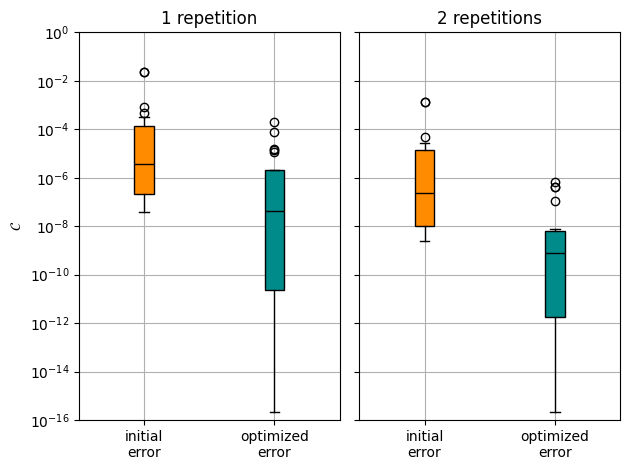

In [16]:
_ = plotting_error_comparison(err_init_1, err_init_2, err_opt_1, err_opt_2, save=True, ftype='pdf')